# **Installing Libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Import data**

In [51]:
df=pd.read_csv('Automobile.csv', sep=';')

In [52]:
df.head()

,Make,Model,Year,Fuel_Type,HorsePower,Cylinders,Transmission_Type,Wheels_Driven,Number_of_Doors,Market_Segment,Vehicle_Size,Vehicle_Type,MPG_highway,MPG_City,Popularity,MSRP
0,Ferrari,Enzo,2003,premium unleaded (required),660,12,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,12,7,2774,643330
1,Lamborghini,Aventador,2014,premium unleaded (required),720,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
2,Lamborghini,Aventador,2015,premium unleaded (required),720,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
3,Lamborghini,Aventador,2016,premium unleaded (required),750,12,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500
4,Maybach,62,2010,premium unleaded (required),631,12,AUTOMATIC,rear wheel drive,4,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,506500


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11908 entries, 0 to 11907
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11908 non-null  object
 1   Model              11908 non-null  object
 2   Year               11908 non-null  int64 
 3   Fuel_Type          11905 non-null  object
 4   HorsePower         11908 non-null  int64 
 5   Cylinders          11908 non-null  int64 
 6   Transmission_Type  11908 non-null  object
 7   Wheels_Driven      11908 non-null  object
 8   Number_of_Doors    11908 non-null  int64 
 9   Market_Segment     8166 non-null   object
 10  Vehicle_Size       11908 non-null  object
 11  Vehicle_Type       11908 non-null  object
 12  MPG_highway        11908 non-null  int64 
 13  MPG_City           11908 non-null  int64 
 14  Popularity         11908 non-null  int64 
 15  MSRP               11908 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.5

In [54]:
df.nunique()

Make                   47
Model                 912
Year                   28
Fuel_Type              10
HorsePower            356
Cylinders               8
Transmission_Type       5
Wheels_Driven           4
Number_of_Doors         3
Market_Segment         71
Vehicle_Size            3
Vehicle_Type           16
MPG_highway            59
MPG_City               69
Popularity             47
MSRP                 6044
dtype: int64

# **Data Visualization**

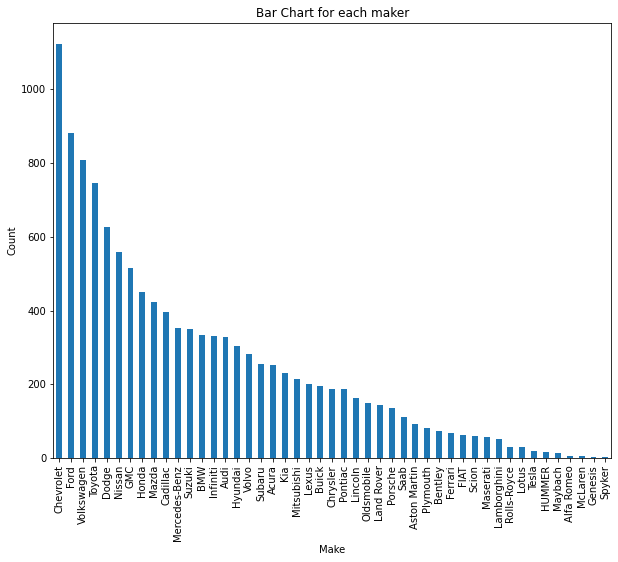

In [55]:
plt.rcParams["figure.figsize"] = (10,8)
df['Make'].value_counts().plot(kind = 'bar')

plt.title('Bar Chart for each maker')
plt.xlabel('Make')
plt.ylabel('Count')

plt.show()

In [56]:
#in plotly
fig=px.bar(df['Make'].value_counts(), title='Bar Chart for each maker')
fig.show()

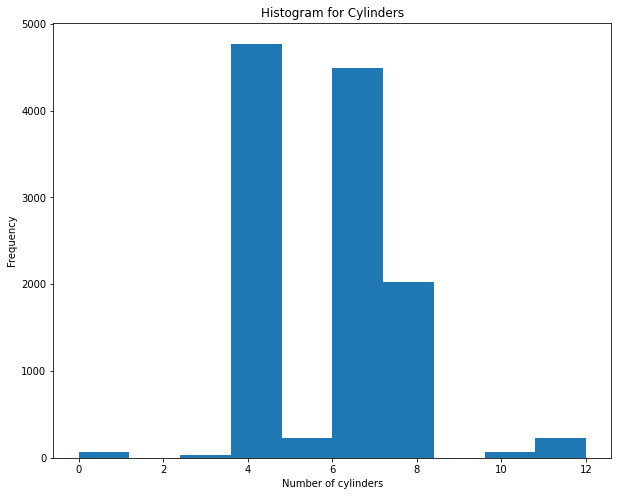

In [57]:
df['Cylinders'].plot(kind='hist')
plt.xlabel('Number of cylinders')
plt.ylabel('Frequency')
plt.title('Histogram for Cylinders')
plt.show()

In [58]:
#in plotly
fig=px.histogram(df['Cylinders'], title='Histogram for Cylinders')
fig.show()

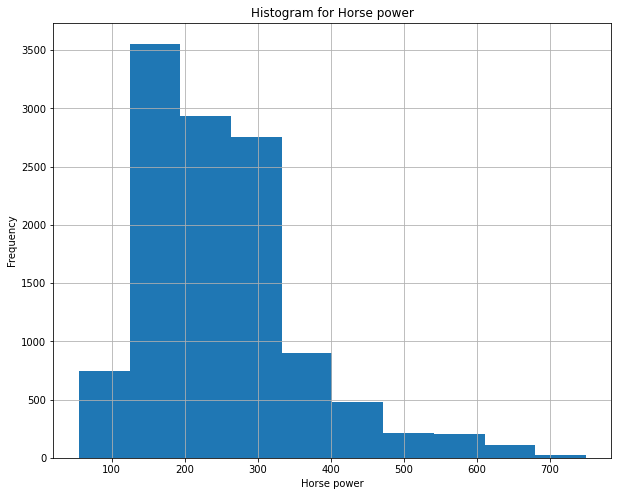

In [59]:
df['HorsePower'].hist()
plt.xlabel('Horse power')
plt.ylabel('Frequency')
plt.title('Histogram for Horse power')
plt.show()

In [60]:
trans=df.groupby(['Transmission_Type']).size().reset_index().rename(columns={0:'counts'})
trans

,Transmission_Type,counts
0,AUTOMATED_MANUAL,622
1,AUTOMATIC,8264
2,DIRECT_DRIVE,68
3,MANUAL,2935
4,UNKNOWN,19


In [61]:
fig=px.pie(trans,values='counts', names='Transmission_Type', title='Pie Chart distribution for transmission types')
fig.show()

In [62]:
avghp=df.groupby('Make')['HorsePower'].mean().to_frame().reset_index()
avghp

,Make,HorsePower
0,Acura,244.797619
1,Alfa Romeo,237.000000
2,Aston Martin,484.322581
3,Audi,277.695122
4,BMW,326.907186
5,Bentley,533.851351
6,Buick,219.244898
7,Cadillac,332.309824
8,Chevrolet,246.983081
9,Chrysler,229.139037


In [63]:
fig=px.bar(avghp, x='Make', y='HorsePower', title='Bar chart for average horse power')
fig.show()

In [64]:
avghp=avghp.sort_values(by=['HorsePower'],ascending=False)

In [65]:
fig=px.bar(avghp[:10], x='Make', y='HorsePower',title='Bar chart for average horse power')
fig.show() #top 10 car makes with highest average horsepower

In [66]:
make=df.groupby(['Make']).size().reset_index().rename(columns={0:'counts'})
make


,Make,counts
0,Acura,252
1,Alfa Romeo,5
2,Aston Martin,93
3,Audi,328
4,BMW,334
5,Bentley,74
6,Buick,196
7,Cadillac,397
8,Chevrolet,1123
9,Chrysler,187


In [67]:
fig=px.bar(make, x='Make', y='counts', title='Bar chart for Number of sales for each maker')
fig.show()

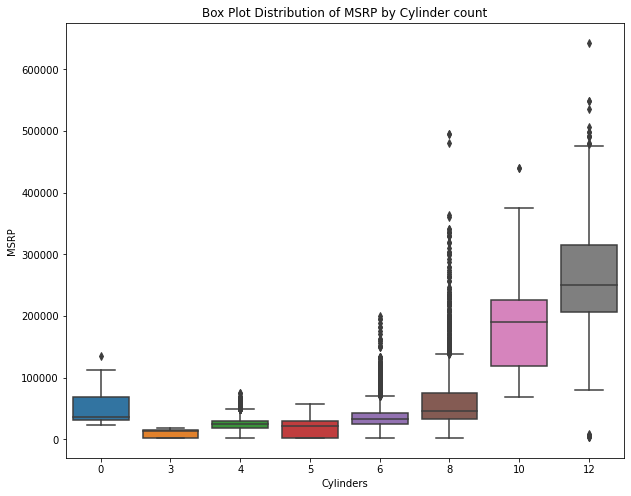

In [68]:
sns.boxplot(x=df['Cylinders'], y=df['MSRP'])
plt.title('Box Plot Distribution of MSRP by Cylinder count')
plt.show()

In [69]:
fig=px.box(x=df['Cylinders'], y=df['MSRP'], title='Box Plot Distribution of MSRP by Cylinder count')
fig.show()

In [70]:
df.corr()

,Year,HorsePower,Cylinders,Number_of_Doors,MPG_highway,MPG_City,Popularity,MSRP
Year,1.000000,0.354451,-0.042293,0.263907,0.258258,0.198154,0.073043,0.283177
HorsePower,0.354451,1.000000,0.761225,-0.100147,-0.352676,-0.345929,0.039170,0.735233
Cylinders,-0.042293,0.761225,1.000000,-0.140117,-0.621656,-0.594172,0.044759,0.579204
Number_of_Doors,0.263907,-0.100147,-0.140117,1.000000,0.118384,0.120726,-0.048416,-0.139937
MPG_highway,0.258258,-0.352676,-0.621656,0.118384,1.000000,0.886740,-0.021428,-0.175654
MPG_City,0.198154,-0.345929,-0.594172,0.120726,0.886740,1.000000,-0.003601,-0.174912
Popularity,0.073043,0.039170,0.044759,-0.048416,-0.021428,-0.003601,1.000000,-0.049802
MSRP,0.283177,0.735233,0.579204,-0.139937,-0.175654,-0.174912,-0.049802,1.000000


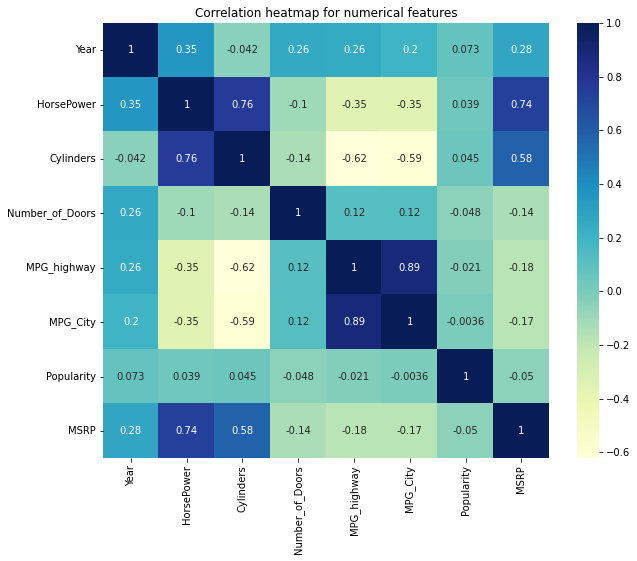

In [71]:
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.title('Correlation heatmap for numerical features')
plt.show()

# **Missing Value Treatment**

In [72]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Fuel_Type               3
HorsePower              0
Cylinders               0
Transmission_Type       0
Wheels_Driven           0
Number_of_Doors         0
Market_Segment       3742
Vehicle_Size            0
Vehicle_Type            0
MPG_highway             0
MPG_City                0
Popularity              0
MSRP                    0
dtype: int64

In [73]:
df['Fuel_Type'] =  df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0])
df['Market_Segment'] =  df['Market_Segment'].fillna(df['Market_Segment'].mode()[0])


In [74]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Fuel_Type            0
HorsePower           0
Cylinders            0
Transmission_Type    0
Wheels_Driven        0
Number_of_Doors      0
Market_Segment       0
Vehicle_Size         0
Vehicle_Type         0
MPG_highway          0
MPG_City             0
Popularity           0
MSRP                 0
dtype: int64

# **Outlier Treatment**

In [75]:
n_total = df.shape[0]
cols = ['HorsePower', 'Cylinders', 'Number_of_Doors',  'MPG_highway', 'MPG_City', 'Popularity']

df_out = pd.DataFrame(columns = ['Selected_Column', 'No_of_Outliers', 'No_of_Values', 'Outlier_Proportion'])

In [76]:
for i in cols:
  quartile_1, quartile_3 = np.percentile(df[i], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_bound = quartile_1 - (iqr * 1.5)
  upper_bound = quartile_3 + (iqr * 1.5)
  temp = df[(df[i] < lower_bound) | (df[i]> upper_bound)]
  n_outliers = temp.shape[0]
  outlier_prop = round((n_outliers/n_total)*100,2)
  df_out = df_out.append({'Selected_Column': i, 'No_of_Outliers': n_outliers, 'No_of_Values': n_total, 'Outlier_Proportion': outlier_prop}, ignore_index = True)

df_out

,Selected_Column,No_of_Outliers,No_of_Values,Outlier_Proportion
0,HorsePower,503,11908,4.22
1,Cylinders,361,11908,3.03
2,Number_of_Doors,0,11908,0.00
3,MPG_highway,192,11908,1.61
4,MPG_City,316,11908,2.65
5,Popularity,881,11908,7.40


In [77]:
#outliers are treated with IQR values
cols = ['HorsePower', 'Cylinders', 'Number_of_Doors',  'MPG_highway', 'MPG_City', 'Popularity']

upp_bound = []
low_bound = []
for i in cols:
  q1, q3 = np.percentile(df[i], [25, 75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  c1 = df[i] < lower_bound
  c2 = df[i] > upper_bound
  df.loc[c1, i] = lower_bound
  df.loc[c2, i] = upper_bound
  upp_bound.append(upper_bound)
  low_bound.append(lower_bound)

In [78]:
df.head()

,Make,Model,Year,Fuel_Type,HorsePower,Cylinders,Transmission_Type,Wheels_Driven,Number_of_Doors,Market_Segment,Vehicle_Size,Vehicle_Type,MPG_highway,MPG_City,Popularity,MSRP
0,Ferrari,Enzo,2003,premium unleaded (required),495,9,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,12,7,2774,643330
1,Lamborghini,Aventador,2014,premium unleaded (required),495,9,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
2,Lamborghini,Aventador,2015,premium unleaded (required),495,9,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
3,Lamborghini,Aventador,2016,premium unleaded (required),495,9,AUTOMATED_MANUAL,all wheel drive,2,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500
4,Maybach,62,2010,premium unleaded (required),495,9,AUTOMATIC,rear wheel drive,4,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,506500


# **Categorical Encoding**

In [79]:
df=pd.get_dummies(columns=['Make','Model','Market_Segment','Fuel_Type', 'Transmission_Type', 'Vehicle_Type', 'Vehicle_Size', 'Wheels_Driven'], data=df, drop_first=True)

In [80]:
df

,Year,HorsePower,Cylinders,Number_of_Doors,MPG_highway,MPG_City,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle_Type_Passenger Minivan,Vehicle_Type_Passenger Van,Vehicle_Type_Regular Cab Pickup,Vehicle_Type_Sedan,Vehicle_Type_Wagon,Vehicle_Size_Large,Vehicle_Size_Midsize,Wheels_Driven_four wheel drive,Wheels_Driven_front wheel drive,Wheels_Driven_rear wheel drive
0,2003,495,9,2,12,7,2774,643330,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,495,9,2,16,10,1158,548800,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2015,495,9,2,16,10,1158,548800,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2016,495,9,2,18,11,1158,535500,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2010,495,9,4,16,10,67,506500,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,1998,95,4,2,26,22,481,2000,0,0,...,0,0,0,0,0,0,0,1,0,0
11904,1998,95,4,2,26,22,481,2000,0,0,...,0,0,0,0,0,0,0,0,0,1
11905,1991,97,4,2,29,22,640,2000,0,0,...,0,0,0,0,0,0,0,0,1,0
11906,1991,145,6,2,26,18,640,2000,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Multicollinearity check**

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df[['Year', 'HorsePower', 'Cylinders','Number_of_Doors', 'MPG_highway', 'MPG_City', 'Popularity']]

vif=pd.DataFrame()
vif['Features']=x.columns

vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,Year,147.183502
1,HorsePower,17.912226
2,Cylinders,54.579485
3,Number_of_Doors,16.756187
4,MPG_highway,196.667393
5,MPG_City,202.031048
6,Popularity,2.591573


In [82]:
#we need to drop variables one by one 
x=df[['Year', 'HorsePower', 'Cylinders','Number_of_Doors', 'MPG_highway', 'Popularity']]

vif=pd.DataFrame()
vif['Features']=x.columns

vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,Year,134.337562
1,HorsePower,17.061474
2,Cylinders,52.589738
3,Number_of_Doors,16.678741
4,MPG_highway,42.547057
5,Popularity,2.587026


In [83]:
x=df[[ 'HorsePower', 'Cylinders','Number_of_Doors', 'MPG_highway', 'Popularity']]

vif=pd.DataFrame()
vif['Features']=x.columns

vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,HorsePower,16.731260
1,Cylinders,23.909884
2,Number_of_Doors,14.852422
3,MPG_highway,10.798551
4,Popularity,2.572227


In [84]:
x=df[[ 'HorsePower','Number_of_Doors', 'MPG_highway', 'Popularity']]

vif=pd.DataFrame()
vif['Features']=x.columns

vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,HorsePower,5.192807
1,Number_of_Doors,13.101939
2,MPG_highway,10.798362
3,Popularity,2.515446


In [85]:
x=df[[ 'HorsePower', 'MPG_highway', 'Popularity']]

vif=pd.DataFrame()
vif['Features']=x.columns

vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,HorsePower,4.141807
1,MPG_highway,4.406656
2,Popularity,2.514094


In [86]:
#we will use only these columns and remaining dummy columns to make predictions

In [87]:
df=df.drop(['Year', 'Cylinders','Number_of_Doors', 'MPG_City'], axis=1)

In [88]:
df

,HorsePower,MPG_highway,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,...,Vehicle_Type_Passenger Minivan,Vehicle_Type_Passenger Van,Vehicle_Type_Regular Cab Pickup,Vehicle_Type_Sedan,Vehicle_Type_Wagon,Vehicle_Size_Large,Vehicle_Size_Midsize,Wheels_Driven_four wheel drive,Wheels_Driven_front wheel drive,Wheels_Driven_rear wheel drive
0,495,12,2774,643330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,495,16,1158,548800,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,495,16,1158,548800,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,495,18,1158,535500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,495,16,67,506500,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,95,26,481,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11904,95,26,481,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11905,97,29,640,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11906,145,26,640,2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Feature Scaling**

In [89]:
#Normalization
def fun(x):
  for i in x.values:
    minmax=(x-x.min())/(x.max()-x.min())
    return minmax

In [90]:
col=df[['HorsePower',	'MPG_highway',	'Popularity',	'MSRP']]

In [91]:
norm=fun(col)

In [92]:
norm

,HorsePower,MPG_highway,Popularity,MSRP
0,1.000000,0.000000,0.660472,1.000000
1,1.000000,0.133333,0.275435,0.852603
2,1.000000,0.133333,0.275435,0.852603
3,1.000000,0.200000,0.275435,0.831865
4,1.000000,0.133333,0.015487,0.786647
...,...,...,...,...
11903,0.090909,0.466667,0.114129,0.000000
11904,0.090909,0.466667,0.114129,0.000000
11905,0.095455,0.566667,0.152013,0.000000
11906,0.204545,0.466667,0.152013,0.000000


In [94]:
df.drop(['HorsePower',	'MPG_highway',	'Popularity',	'MSRP'], axis=1, inplace=True)

In [95]:
df=pd.concat([df,norm], axis=1)

In [96]:
df

,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,Vehicle_Type_Wagon,Vehicle_Size_Large,Vehicle_Size_Midsize,Wheels_Driven_four wheel drive,Wheels_Driven_front wheel drive,Wheels_Driven_rear wheel drive,HorsePower,MPG_highway,Popularity,MSRP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1.000000,0.000000,0.660472,1.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.000000,0.133333,0.275435,0.852603
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.000000,0.133333,0.275435,0.852603
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.000000,0.200000,0.275435,0.831865
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1.000000,0.133333,0.015487,0.786647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.090909,0.466667,0.114129,0.000000
11904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.090909,0.466667,0.114129,0.000000
11905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.095455,0.566667,0.152013,0.000000
11906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.204545,0.466667,0.152013,0.000000


# **Splitting Data into Train and Test Data**

In [97]:
from sklearn.model_selection import train_test_split

y = df['MSRP']
X = df.drop('MSRP', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



# **Model Building**

In [98]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train, y_train)

# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# random Forest regressor
from sklearn.ensemble import RandomForestRegressor

rf =  RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
y_train

10201    0.017908
9483     0.026024
11294    0.000000
4385     0.052017
2495     0.067828
           ...   
8416     0.032269
5575     0.045530
9795     0.023163
154      0.386696
2429     0.068600
Name: MSRP, Length: 8335, dtype: float64

In [103]:
y_test

9514     0.025751
11649    0.000000
440      0.213307
4231     0.052937
7514     0.036487
           ...   
9485     0.026008
2687     0.065489
11482    0.000000
9867     0.022374
3960     0.054777
Name: MSRP, Length: 3573, dtype: float64

# **Model Predictions**

In [99]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
#Linear Regression
lr_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
r2_sc = r2_score(y_test, lr_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)
#it will a bad model, as we have scaled the values in 0 to 1

Mean absolute error:  13445037.9843373 
Root Mean Squared Error:  224435393.17663422 
R2 score:  -8.90761877490148e+18


In [106]:
#Decision Tree
dt_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, dt_pred)
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
r2_sc = r2_score(y_test, dt_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)

Mean absolute error:  0.005496539908716317 
Root Mean Squared Error:  0.016343868025829402 
R2 score:  0.9527623129980434


In [105]:
#Random Forest
rf_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2_sc = r2_score(y_test, rf_pred)

print('Mean absolute error: ', mae, '\nRoot Mean Squared Error: ', rmse, '\nR2 score: ', r2_sc)

Mean absolute error:  0.005490236518025215 
Root Mean Squared Error:  0.013289228890452323 
R2 score:  0.9687695318827213


# **Scatter Plot of True Values and Linear Regression Predictions**

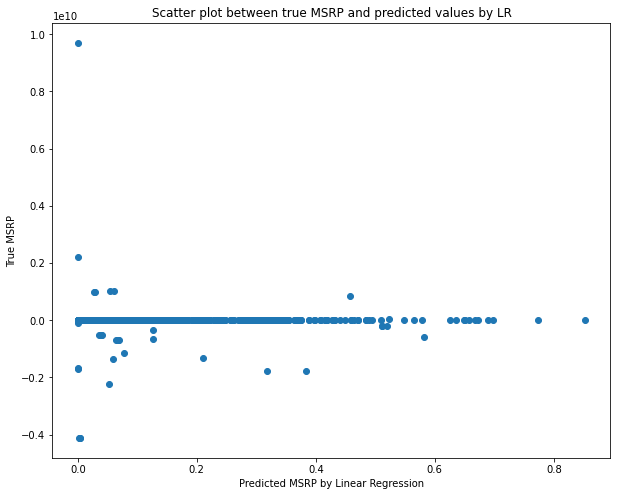

In [107]:
plt.scatter(y_test,lr_pred)
plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Linear Regression')
plt.title('Scatter plot between true MSRP and predicted values by LR')
plt.show()

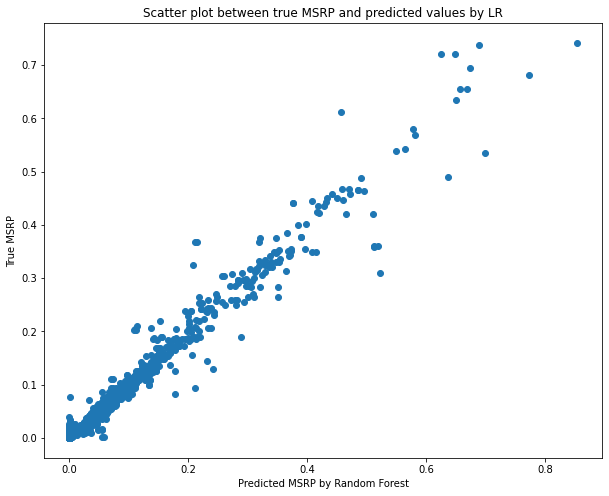

In [108]:
plt.scatter(y_test,rf_pred)
plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Random Forest')
plt.title('Scatter plot between true MSRP and predicted values by RF')
plt.show()

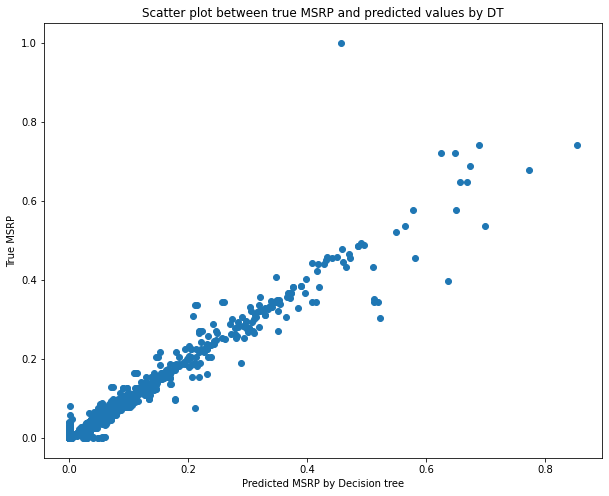

In [127]:
plt.scatter(y_test,dt_pred)
plt.ylabel('True MSRP')
plt.xlabel('Predicted MSRP by Decision tree')
plt.title('Scatter plot between true MSRP and predicted values by DT')
plt.show()